# Iris Flower Classification

In [1]:
#import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Load dataset

In [2]:
iris_dataset = pd.read_csv('.\Iris1.csv')

dimension

In [3]:
iris_dataset.shape

(150, 6)

peek

In [4]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical summary 

In [6]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Breakdown by class variable

In [7]:
iris_dataset['Id'].value_counts()


1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 150, dtype: int64

In [8]:
iris_dataset['SepalLengthCm'].value_counts()


5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64

In [9]:
iris_dataset['SepalWidthCm'].value_counts()


3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

In [10]:
iris_dataset['PetalLengthCm'].value_counts()


1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64

In [11]:
iris_dataset['PetalWidthCm'].value_counts()


0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

Univarited Plot

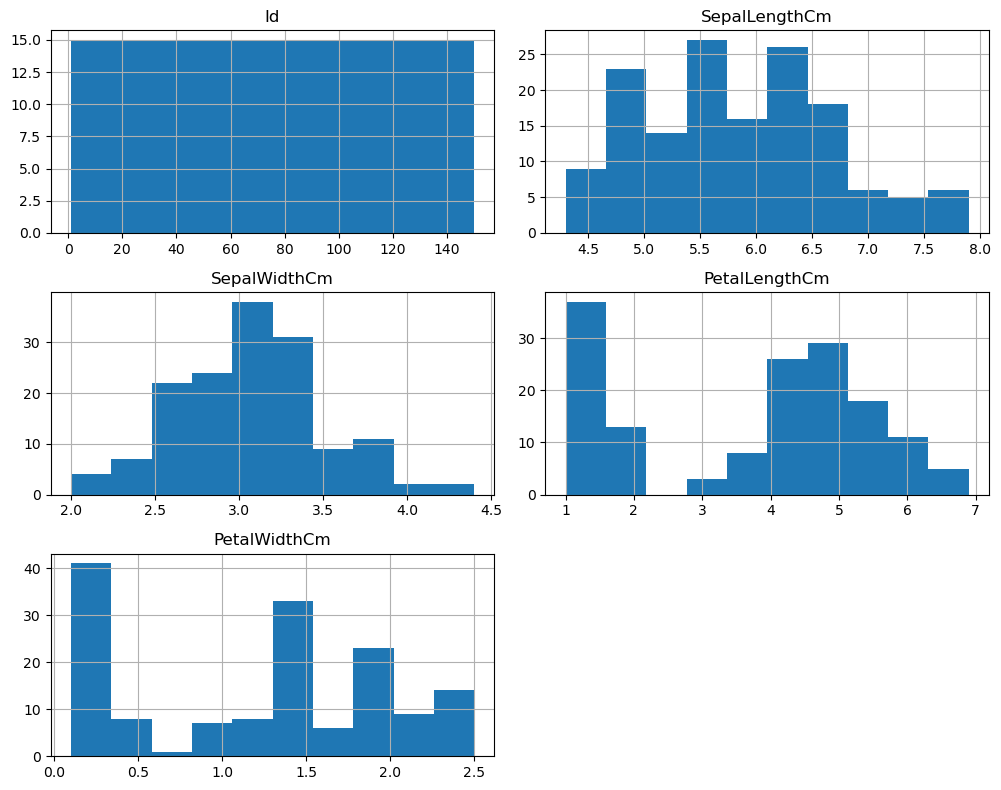

In [12]:
iris_dataset.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [13]:
X=iris_dataset.drop(columns='Species',axis=1)

Multivariate plots 

In [14]:
corr = X.corr()

<AxesSubplot:>

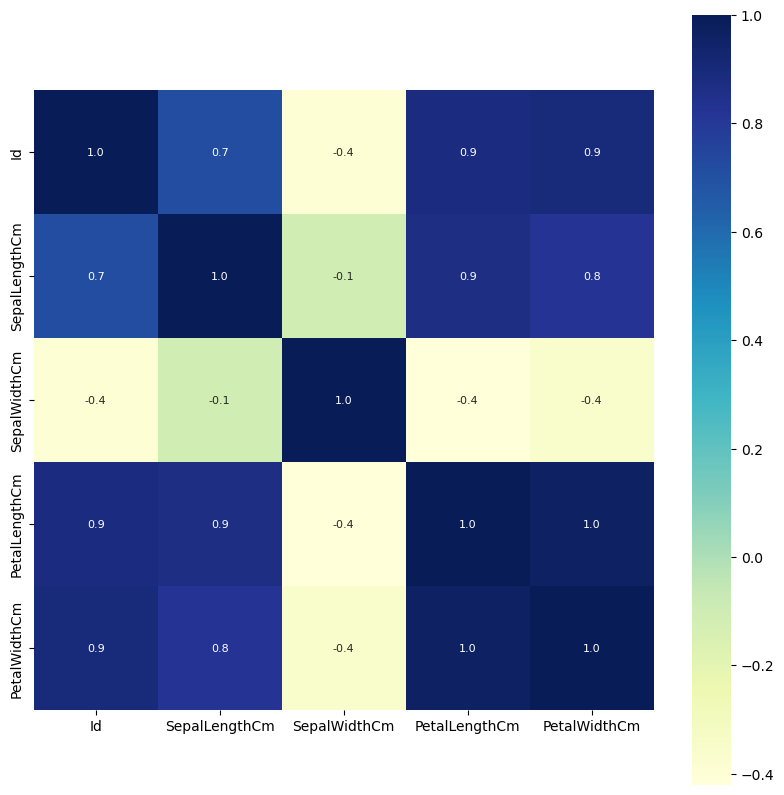

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='YlGnBu')

In [16]:
y = iris_dataset['Species']

In [17]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


Split the data

In [18]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [19]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [20]:
print(y.shape,y_train.shape,y_validation.shape)

(150,) (120,) (30,)


In [21]:
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [22]:
print(X.shape,X_train.shape,X_validation.shape)

(150, 5) (120, 5) (30, 5)


Set-up the test harness to use 10-fold cross validation.

In [23]:
# Set-up 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

Logistic Regression (LR)

In [24]:
# Create a Logistic Regression model
model = LogisticRegression(solver='liblinear', multi_class='ovr')

In [25]:
# Perform 10-fold cross-validation and evaluate the model
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Output cross-validation results
print(f"Logistic Regression: {cv_results.mean():.4f} ({cv_results.std():.4f})")

Logistic Regression: 0.9333 (0.0624)


In [26]:

# Train the Logistic Regression model on the training dataset
model.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [27]:
# Make predictions on the validation dataset
predictions = model.predict(X_validation)

# Evaluate accuracy on the validation dataset
print(f"Accuracy on validation set: {accuracy_score(y_validation, predictions):.4f}")

Accuracy on validation set: 0.9000


Linear Discriminant Analysis

In [28]:
lda = LinearDiscriminantAnalysis()

In [29]:
# Perform 10-fold cross-validation on the training dataset
cv_results = cross_val_score(lda, X_train, y_train, cv=kfold, scoring='accuracy')

In [30]:
# Print cross-validation results
print(f"LDA: {cv_results.mean():.4f} ({cv_results.std():.4f})")

LDA: 1.0000 (0.0000)


In [31]:
# Train the LDA model on the entire training dataset
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
# Make predictions on the validation dataset
predictions = lda.predict(X_validation)

In [33]:

# Evaluate the accuracy on the validation dataset
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on validation set: {accuracy:.4f}")

Accuracy on validation set: 1.0000


K Nearest Neighbour

In [34]:
# Initialize the KNN model
knn = KNeighborsClassifier()

In [35]:
# Evaluate KNN model using 10-fold cross-validation
cv_results = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation accuracy results
print(f"KNN Cross-Validation Accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

KNN Cross-Validation Accuracy: 1.0000 (0.0000)


D:\Project CHARLIE\Anaconda.py\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Project CHARLIE\Anaconda.py\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [36]:
# Train the KNN model on the full training dataset
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [37]:
# Make predictions on the validation dataset
predictions = knn.predict(X_validation)

# Evaluate the model performance on the validation dataset
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on Validation Set: {accuracy:.4f}")

Accuracy on Validation Set: 1.0000


D:\Project CHARLIE\Anaconda.py\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Support Vector Machines (SVM).

In [38]:
# Initialize the SVM model
model = SVC(gamma='auto')


In [39]:
print(f"SVM: {cv_results.mean():.4f} ({cv_results.std():.4f})")

SVM: 1.0000 (0.0000)


In [40]:
# Train the SVM model on the training dataset
model.fit(X_train, y_train)

SVC(gamma='auto')

In [41]:
# Make predictions on the validation dataset
predictions = model.predict(X_validation)

# Evaluate the accuracy on the validation dataset
print(f"Accuracy on validation set: {accuracy_score(y_validation, predictions):.4f}")

Accuracy on validation set: 1.0000


Classification and Regression Trees (CART).

In [42]:
# Initialize the CART model
cart_model = DecisionTreeClassifier()

In [43]:
# Display cross-validation results
print(f"CART - Cross-Validation Accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

CART - Cross-Validation Accuracy: 1.0000 (0.0000)


In [44]:
# Train the CART model on the entire training dataset
cart_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [45]:
# Make predictions on the validation dataset
predictions = cart_model.predict(X_validation)

# Evaluate the performance on the validation dataset
validation_accuracy = accuracy_score(y_validation, predictions)
print(f"CART - Accuracy on validation set: {validation_accuracy:.4f}")

CART - Accuracy on validation set: 1.0000


Gaussian Naive Bayes (NB).

In [46]:
# Initialize Gaussian Naive Bayes model
model = GaussianNB()

In [47]:
print(f"Gaussian Naive Bayes cross-validation accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

Gaussian Naive Bayes cross-validation accuracy: 1.0000 (0.0000)


In [48]:
# Fit the model on the training dataset
model.fit(X_train, y_train)

GaussianNB()

In [49]:
# Make predictions on the validation dataset
predictions = model.predict(X_validation)

# Evaluate accuracy on the validation dataset
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on validation set: {accuracy:.4f}")

Accuracy on validation set: 0.9667


# The End